## Make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [19]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('shampoo-sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [21]:
# remove the wrong data (last row)
df=df.dropna()
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [22]:
df['Date']=pd.to_datetime('200'+df.Month,format='%Y-%m')
df

,Month,Sales,Date
0,1-01,266.0,2001-01-01
1,1-02,145.9,2001-02-01
2,1-03,183.1,2001-03-01
3,1-04,119.3,2001-04-01
4,1-05,180.3,2001-05-01
5,1-06,168.5,2001-06-01
6,1-07,231.8,2001-07-01
7,1-08,224.5,2001-08-01
8,1-09,192.8,2001-09-01
9,1-10,122.9,2001-10-01


In [23]:
df=df.drop(columns=['Month'])
df.head()

,Sales,Date
0,266.0,2001-01-01
1,145.9,2001-02-01
2,183.1,2001-03-01
3,119.3,2001-04-01
4,180.3,2001-05-01


In [24]:
df.set_index('Date',inplace=True)
df.head()

,Sales
Date,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


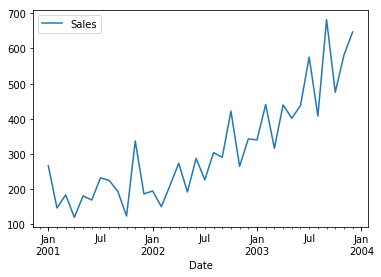

In [25]:
df.plot()
plt.show()

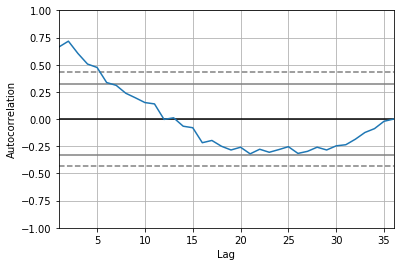

In [26]:
# Autocorrelation plot
pd.plotting.autocorrelation_plot(df)

## There is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

## A good starting point for the AR parameter of the model may be 5.

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 02 Jun 2019   AIC                            406.340
Time:                        23:15:09   BIC                            417.227
Sample:                    02-01-2001   HQIC                           410.098
                         - 12-01-2003                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

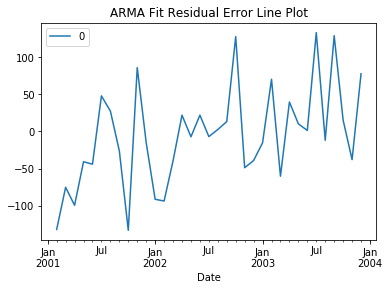

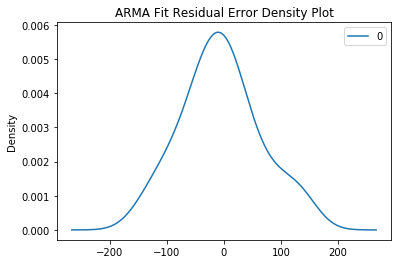

                0
count   35.000000
mean    -5.495200
std     68.132884
min   -133.296600
25%    -42.477939
50%     -7.186562
75%     24.748359
max    133.237980


In [27]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

predicted=349.117700, expected=342.300000
predicted=306.512851, expected=339.700000


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=387.376437, expected=440.400000
predicted=348.154247, expected=315.900000
predicted=386.308752, expected=439.300000
predicted=356.082044, expected=401.300000
predicted=446.379504, expected=437.400000
predicted=394.737284, expected=575.500000
predicted=434.915526, expected=407.600000
predicted=507.923507, expected=682.000000
predicted=435.482873, expected=475.300000
predicted=652.743954, expected=581.300000
predicted=546.343558, expected=646.900000
Test MSE: 6958.326


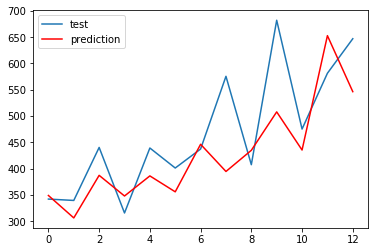

In [28]:
#Rolling Forecast ARIMA model
from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()


## Configuring an ARIMA Model
The classical approach for fitting an ARIMA model is to follow the Box-Jenkins Methodology.

This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.

In summary, the steps of this process are as follows:

Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.
Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.
Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.
The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).